<a href="https://colab.research.google.com/github/noahnguyen2004/Constructing-Confidence-Intervals-for-Estimators/blob/main/CI%20construct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stat 332 assignments/census_2021_10k_rows.csv')

In [ ]:
df

,PPSORT,ABOID,AGEGRP,AGEIMM,ATTSCH,BFNMEMB,BedRm,CFInc,CFInc_AT,CFSTAT,CHDBN,CIP2021,CIP2021_STEM_SUM,CMA,CONDO,COVID_ERB,COW,CQPPB,CapGn,CfSize,ChldC,CitOth,Citizen,DIST,DPGRSUM,DTYPE,EFDecile,EFInc,EFInc_AT,EICBN,ETHDER,EfDIMBM_2018,EfSize,EmpIn,FOL,FPTWK,Gender,GENSTAT,GovtI,GTRfs,HCORENEED_IND,HDGREE,HHInc,HHInc_AT,HHMRKINC,HHSIZE,HHTYPE,HLMOSTEN,HLMOSTFR,HLMOSTNO,HLREGEN,HLREGFR,HLREGNO,IMMCAT5,IMMSTAT,IncTax,Invst,JOBPERM,KOL,LFACT,LICO_BT,LICO_AT,LIPROGTYPE,LI_ELIG_OML_U18,LOCSTUD,LOC_ST_RES,LSTWRK,LWMOSTEN,LWMOSTFR,LWMOSTNO,LWREGEN,LWREGFR,LWREGNO,LoLIMA,LoLIMB,LoMBM_2018,MODE,MTNEN,MTNFR,MTNNO,MarStH,Mob1,Mob5,MrkInc,NAICS,NOC21,NOL,NOS,OASGI,OtInc,PKID25,PKID0_1,PKID15_24,PKID2_5,PKID6_14,PKIDS,POB,POBPAR1,POBPAR2,POWST,PR,PR1,PR5,PresMortG,PRIHM,PWDUR,PWLEAVE,PWOCC,PWPR,REGIND,Relig,REPAIR,ROOM,Retir,SHELCO,SSGRAD,Subsidy,SempI,Tenur,TotInc,TotInc_AT,VISMIN,Value,WKSWRK,WRKACT,Wages,YRIM,WEIGHT,WT1,WT2,WT3,WT4,WT5,WT6,WT7,WT8,WT9,WT10,WT11,WT12,WT13,WT14,WT15,WT16
0,145255,6,13,4,1,0,4,2,2,7,99999999,13,11,535,0,4100,5,99999999,99999999,1,99999999,15,2,7,3,1,1,2,2,99999999,46,2,1,99999999,1,2,2,1,4000,4000,888,2,2,2,1,2,9,0,0,17,0,0,0,21,2,99999999,99999999,1,1,1,2,2,4,9,99,4,3,1,0,0,0,0,1,2,2,2,2,0,0,5,1,1,3,99999999,81,21,4,1,99999999,99999999,9,9,9,9,9,9,21,4,4,5,35,35,35,1,1,5,6,1,35,0,22,1,6,99999999,2900,4,9,99999999,1,4000,5000,3,810000,1,4,99999999,9,37.037854,22.893789,22.893789,249.198831,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789
1,848180,6,10,99,1,0,2,17,15,6,99999999,13,11,505,0,5600,1,99999999,99999999,1,99999999,15,1,3,1,2,5,17,15,99999999,59,14,1,55000,1,1,2,4,5600,5600,0,2,17,15,15,1,8,1,0,1,0,0,0,1,1,11000,99999999,2,1,1,1,1,4,9,99,4,3,1,0,0,0,0,0,1,1,1,2,1,0,1,1,2,2,55000,72,2,1,1,99999999,99999999,9,9,9,9,9,9,1,1,1,4,35,35,35,9,1,2,3,1,35,0,22,1,4,99999999,1600,4,0,99999999,2,61000,50000,1,99999999,5,9,54000,9999,37.037854,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,249.198831,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789
2,640964,6,11,99,3,0,4,31,29,2,2800,4,7,577,0,99999999,1,99999999,99999999,4,99999999,15,1,9,1,1,8,31,29,8400,59,27,4,58000,1,1,1,3,600,11700,0,6,31,29,31,4,2,1,0,1,0,0,0,1,1,8000,99999999,2,1,1,1,1,4,9,6,1,3,1,0,0,0,0,0,1,1,1,9,1,0,13,2,1,3,57000,91,13,9,1,99999999,1,0,0,0,1,0,1,1,1,3,1,35,35,35,1,0,9,9,9,35,0,6,2,11,99999999,3659,6,9,99999999,1,70000,60000,1,1550034,6,11,57000,9999,37.037854,22.893789,22.893789,22.893789,249.198831,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789
3,231943,6,15,99,1,0,3,31,28,2,99999999,4,6,555,0,99999999,1,99999999,99999999,4,99999999,15,1,9,1,1,8,31,28,99999999,17,27,4,65000,1,1,2,2,600,500,0,9,31,28,31,4,2,1,0,1,0,0,0,1,1,9000,99999999,2,1,1,1,1,4,9,6,1,3,1,0,0,0,0,0,1,1,1,9,0,0,13,2,1,1,64000,91,3,9,1,99999999,99999999,0,0,1,0,0,1,1,3,3,1,35,35,35,1,1,9,9,9,35,0,6,1,9,99999999,2100,8,9,99999999,1,65000,55000,1,610000,6,11,65000,9999,37.037854,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,249.198831,22.893789
4,548506,6,10,99,1,0,3,27,25,2,5600,10,8,535,0,10000,1,99999999,99999999,4,4700,15,1,1,1,1,6,27,25,4500,59,24,4,5000,1,1,1,4,13300,23600,0,12,27,25,25,4,2,1,0,1,0,0,0,1,1,99999999,99999999,2,1,2,1,1,4,9,6,1,2,1,0,0,0,0,0,1,1,1,2,1,0,1,2,1,2,6000,62,9,1,1,99999999,99999999,0,1,0,1,0,1,1,1,1,4,35,35,35,0,0,1,4,1,35,0,18,1,6,99999999,900,11,9,1000,1,29000,28000,1,1860000,2,3,5000,9999,37.037854,22.893789,22.893789,22.893789,22.893789,22.893789,249.198831,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789,22.893789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df.columns

Index(['PPSORT', 'ABOID', 'AGEGRP', 'AGEIMM', 'ATTSCH', 'BFNMEMB', 'BedRm',
       'CFInc', 'CFInc_AT', 'CFSTAT',
       ...
       'WT7', 'WT8', 'WT9', 'WT10', 'WT11', 'WT12', 'WT13', 'WT14', 'WT15',
       'WT16'],
      dtype='object', length=144)

In [ ]:
# population with French as the first language spoken at home. the column type is binary (0 as No, 1 as Yes)
df['HLMOSTFR']

,HLMOSTFR
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,1
9997,1
9998,0


In [ ]:
# estimate the population proportion that speaks French as their first official language at home. 95% C.I of the attribute

# french first lang spoken proportion from the sample
fr_p_hat = sum(df['HLMOSTFR']) / len(df)

# standard error = sample standard deviation / sqrt(# sample)
lst_fr_pp = list(df['HLMOSTFR'])
std_err_fr_pp = statistics.stdev(lst_fr_pp) / (len(df) ** 0.5)
print(f"Standard error for HLMOSTFR: {std_err_fr_pp}")

Standard error for HLMOSTFR 0.005047472505905286


In [ ]:
# determine the margin of error
margin_of_error_fr_pp = 1.96 * std_err_fr_pp
print(f"Margin of error for HLMOSTFR: {margin_of_error_fr_pp}")         # 1.96 is the Z-value for a 95% confidence interval

Margin of error for HLMOSTFR: 0.009893046111574362


This means that we should move from our sample proportion in both directions by 0.00989 standard deviations to create a 95% confidence interval

In [ ]:
# constructing a 95% confidence interval
lower_bound_fr_pp = fr_p_hat - margin_of_error_fr_pp
upper_bound_fr_pp = fr_p_hat + margin_of_error_fr_pp
print(f"95% confidence interval for HLMOSTFR: ({lower_bound_fr_pp}, {upper_bound_fr_pp})")

95% confidence interval for HLMOSTFR: (0.19880695388842565, 0.21859304611157435)


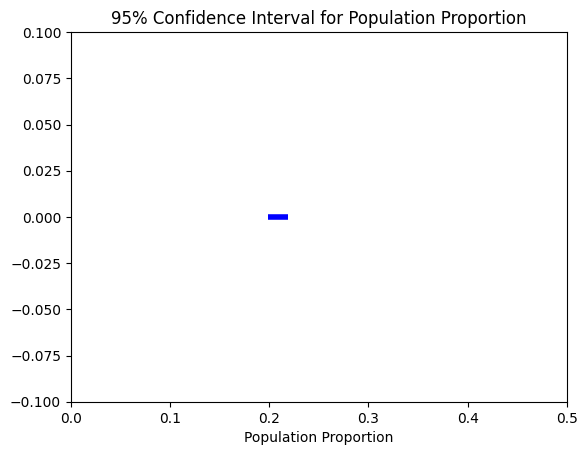

In [ ]:
# Confidence interval
lower_bound = 0.19880695388842565
upper_bound = 0.21859304611157435

# Create the plot
plt.hlines(0, lower_bound, upper_bound, colors='blue', linewidth=4)
plt.xlim(0, 0.5)
plt.ylim(-0.1, 0.1)

# Add labels and title
plt.xlabel('Population Proportion')
plt.title('95% Confidence Interval for Population Proportion')

# Show the plot
plt.show()

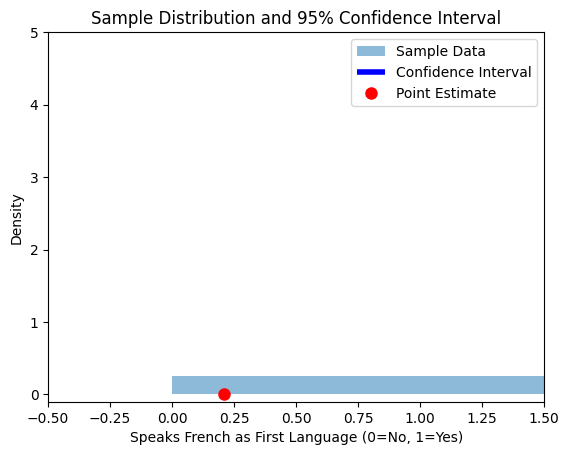

In [ ]:
# Confidence interval
lower_bound = 0.19880695388842565
upper_bound = 0.21859304611157435

# Calculate point estimate (p_hat)
p_hat = (lower_bound + upper_bound) / 2

# Create the histogram
plt.hist(df['HLMOSTFR'], bins=2, density=True, alpha=0.5, label='Sample Data')

# Add the confidence interval
plt.hlines(0, lower_bound, upper_bound, colors='blue', linewidth=4, label='Confidence Interval')
plt.plot(p_hat, 0, 'o', color='red', markersize=8, label='Point Estimate')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.1, 5)

# Add labels and title
plt.xlabel('Speaks French as First Language (0=No, 1=Yes)')
plt.ylabel('Density')
plt.title('Sample Distribution and 95% Confidence Interval')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# estimate the population mean employment income.

